### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
data = pd.read_csv('tennis.csv')

### Performing EDA

In [3]:
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
data['outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [5]:
#Converting categorical value into numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['outlook'].values)
data['outlook'] = le.transform(data['outlook'].values)
df=pd.get_dummies(data,drop_first=True)
df.head()

,outlook,windy,temp_hot,temp_mild,humidity_normal,play_yes
0,2,False,1,0,0,0
1,2,True,1,0,0,0
2,0,False,1,0,0,1
3,1,False,0,1,0,1
4,1,False,0,0,1,1


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['windy'].values)
data['windy'] = le.transform(data['windy'].values)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['temp'].values)
data['temp'] = le.transform(data['temp'].values)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['humidity'].values)
data['humidity'] = le.transform(data['humidity'].values)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['play'].values)
data['play'] = le.transform(data['play'].values)

In [10]:
df=pd.get_dummies(data,drop_first=True)
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [15]:
#Separating features and labels
X = df.drop('play',axis=1).values
y = df['play'].values

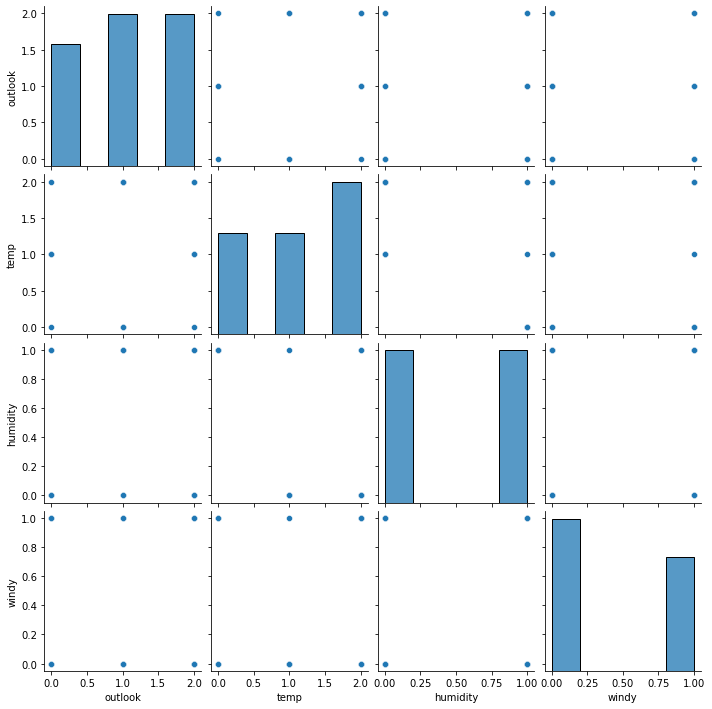

In [16]:
import seaborn as sns
sns.pairplot(data.iloc[:,:-1])

In [38]:
#Splitting into test_train_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
ypred = model.predict(X_test)

In [42]:
model.score(X_test,y_test)

0.2

In [43]:
model.score(X_train,y_train)

1.0

### Vizualizing tree

In [44]:
from sklearn import tree

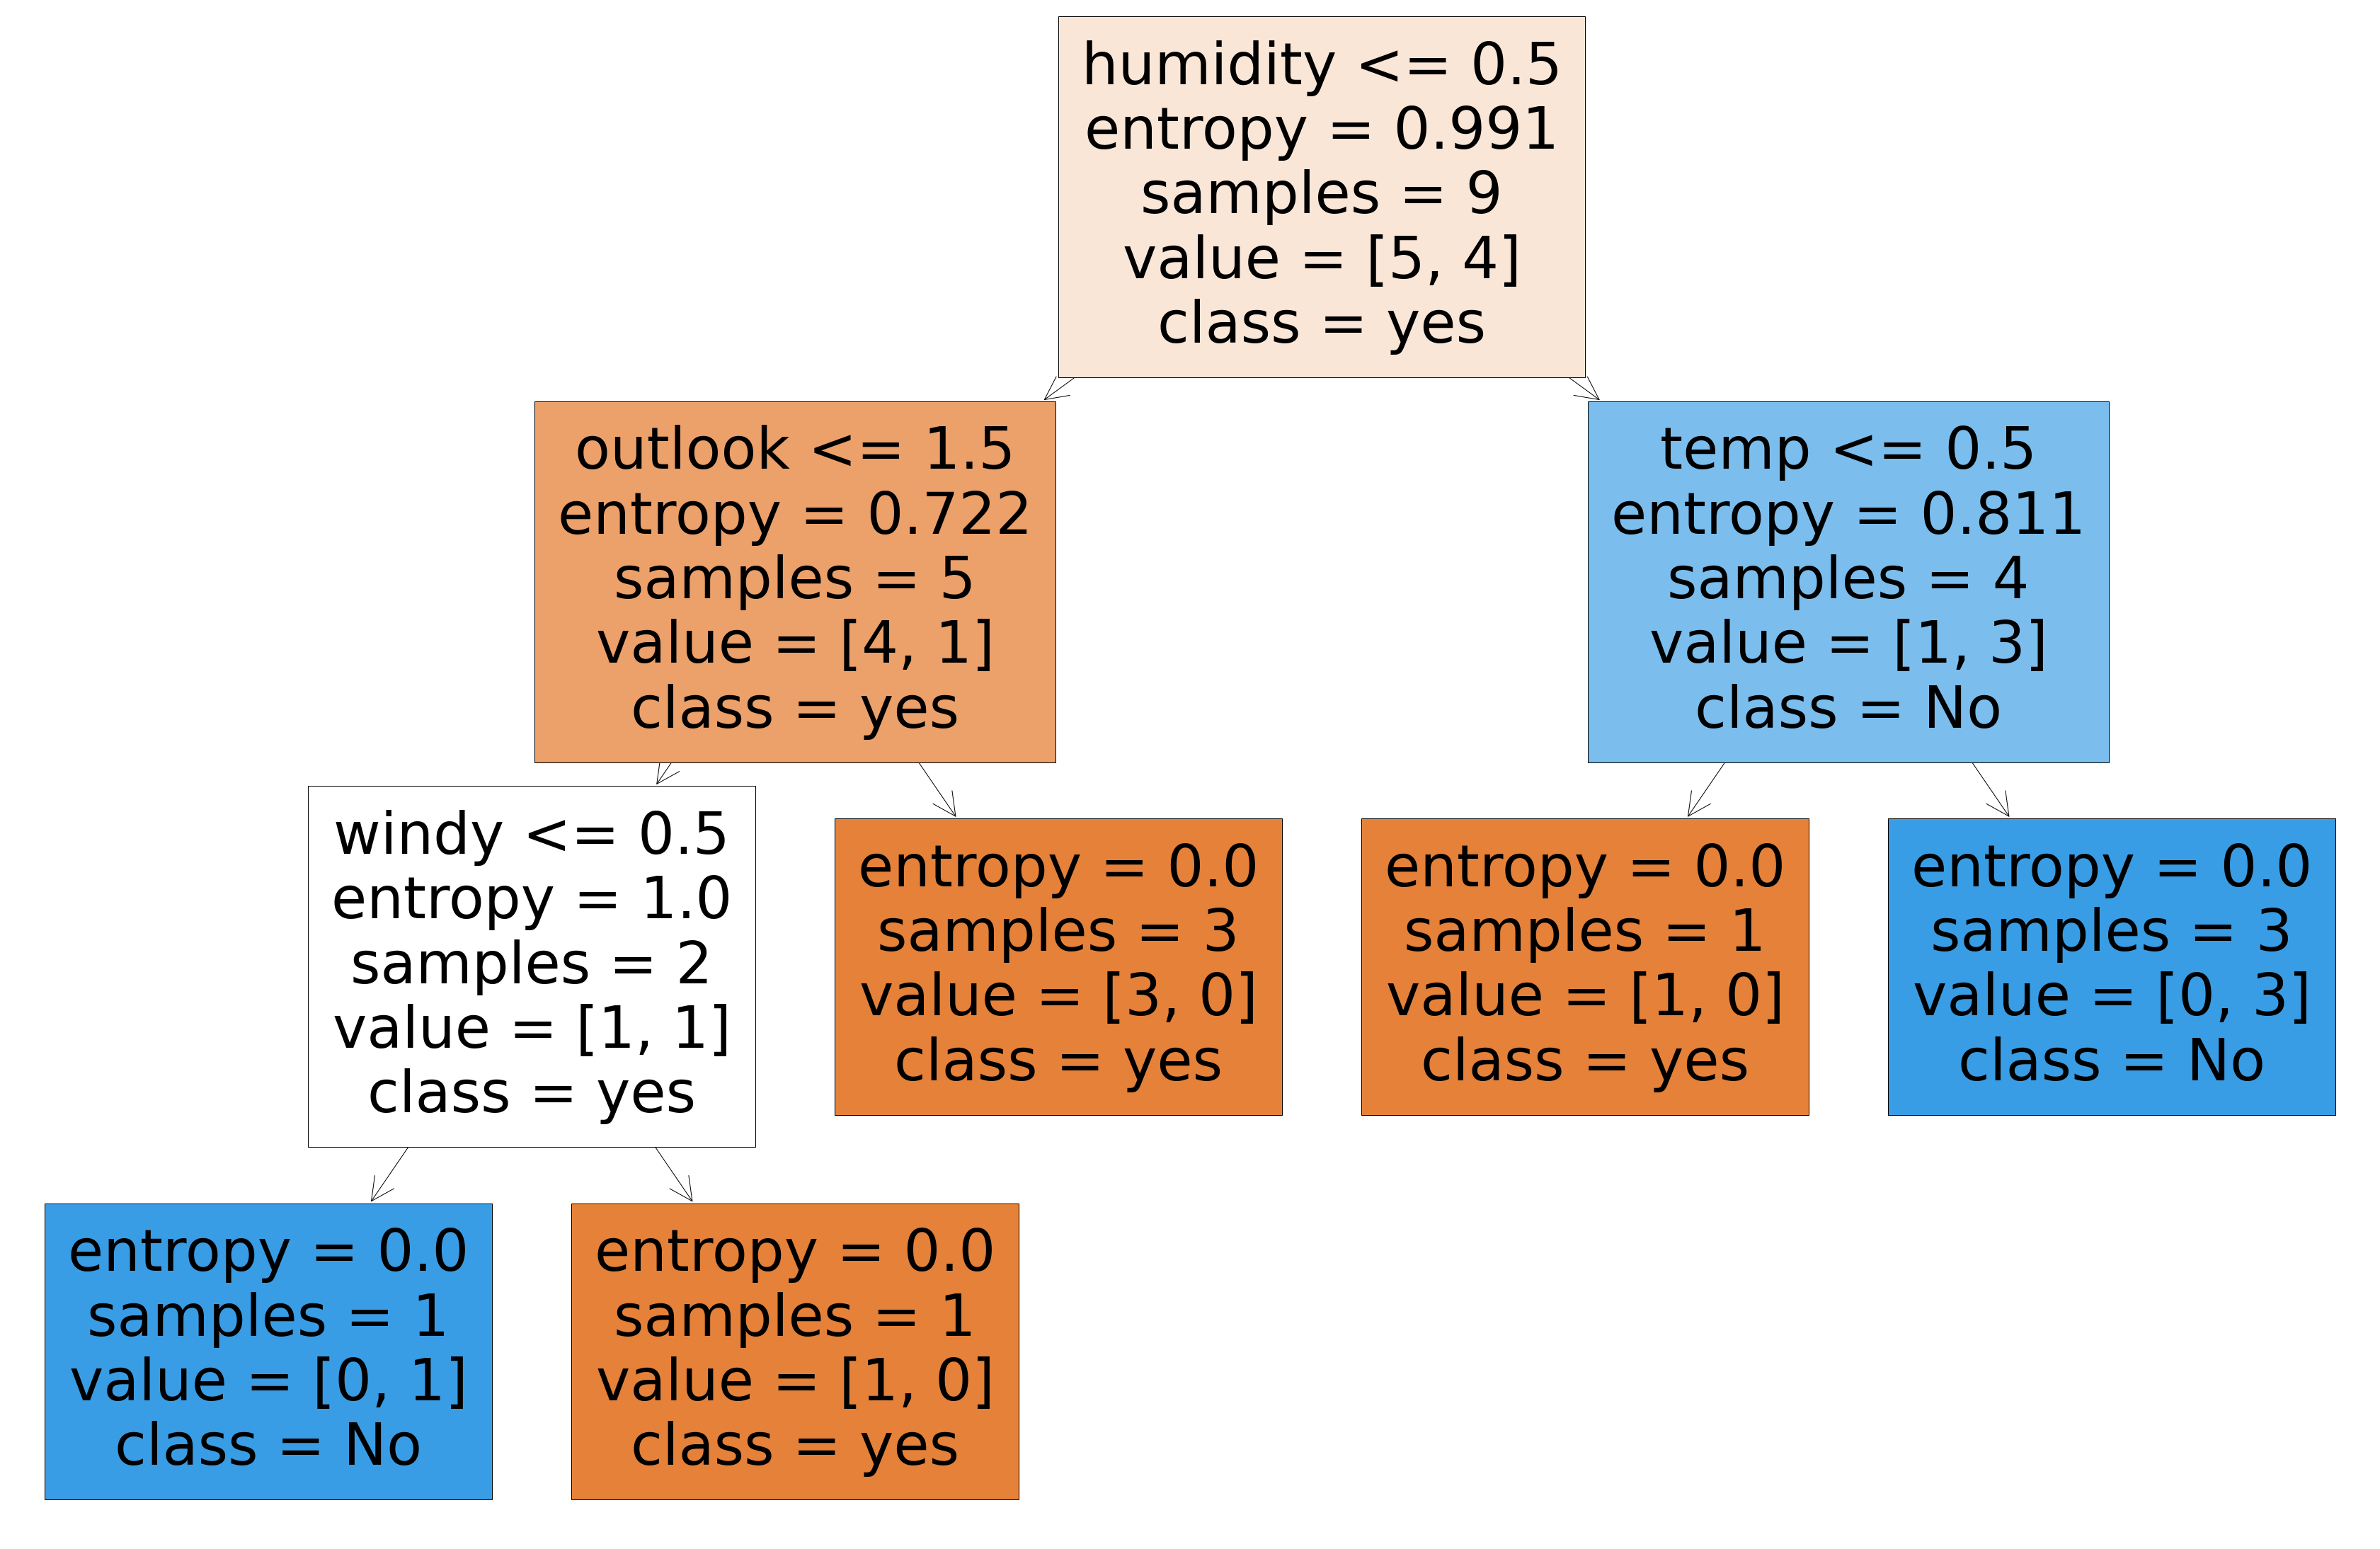

In [45]:
plt.figure(figsize=(60,40))
a = tree.plot_tree(model,max_depth = 3,feature_names=df.columns,class_names=['yes','No'],filled = True)